In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime            #Importing necessary libraries for tsa

In [2]:
Toptucker=pd.read_excel("E:\SaiVenkat\TopTucker.xlsx")  #loading dataset

In [3]:
Toptucker

,Month,Ridership
0,1991-01-01,1709
1,1991-02-01,1621
2,1991-03-01,1973
3,1991-04-01,1812
4,1991-05-01,1975
...,...,...
154,2003-11-01,2076
155,2003-12-01,2141
156,2004-01-01,1832
157,2004-02-01,1838


In [54]:
Toptucker.columns  

Index(['Month', 'Ridership'], dtype='object')

In [55]:
Toptucker.info()  #information about variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      159 non-null    datetime64[ns]
 1   Ridership  159 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.6 KB


In [56]:
Toptucker.index=pd.to_datetime(Toptucker['Month'],format="%b-%y")

In [57]:
Toptucker

,Month,Ridership
Month,,
1991-01-01,1991-01-01,1709
1991-02-01,1991-02-01,1621
1991-03-01,1991-03-01,1973
1991-04-01,1991-04-01,1812
1991-05-01,1991-05-01,1975
...,...,...
2003-11-01,2003-11-01,2076
2003-12-01,2003-12-01,2141
2004-01-01,2004-01-01,1832


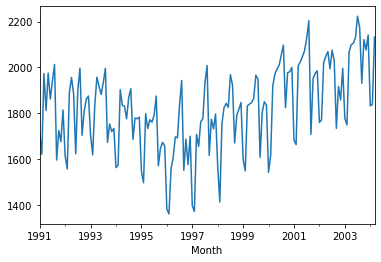

In [58]:
#timeseries plot
Toptucker.Ridership.plot()

In [59]:
#creating a date column to store actual date format for the given month column
Toptucker['Date']=pd.to_datetime(Toptucker['Month'],format="%b-%y")

In [60]:
Toptucker

,Month,Ridership,Date
Month,,,
1991-01-01,1991-01-01,1709,1991-01-01
1991-02-01,1991-02-01,1621,1991-02-01
1991-03-01,1991-03-01,1973,1991-03-01
1991-04-01,1991-04-01,1812,1991-04-01
1991-05-01,1991-05-01,1975,1991-05-01
...,...,...,...
2003-11-01,2003-11-01,2076,2003-11-01
2003-12-01,2003-12-01,2141,2003-12-01
2004-01-01,2004-01-01,1832,2004-01-01


In [61]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 
Toptucker['month']=Toptucker.Date.dt.strftime("%b")
Toptucker

,Month,Ridership,Date,month
Month,,,,
1991-01-01,1991-01-01,1709,1991-01-01,Jan
1991-02-01,1991-02-01,1621,1991-02-01,Feb
1991-03-01,1991-03-01,1973,1991-03-01,Mar
1991-04-01,1991-04-01,1812,1991-04-01,Apr
1991-05-01,1991-05-01,1975,1991-05-01,May
...,...,...,...,...
2003-11-01,2003-11-01,2076,2003-11-01,Nov
2003-12-01,2003-12-01,2141,2003-12-01,Dec
2004-01-01,2004-01-01,1832,2004-01-01,Jan


In [69]:
Toptucker['year']=Toptucker.Date.dt.strftime("%Y")
Toptucker

,Month,Ridership,Date,month,year
Month,,,,,
1991-01-01,1991-01-01,1709,1991-01-01,Jan,1991
1991-02-01,1991-02-01,1621,1991-02-01,Feb,1991
1991-03-01,1991-03-01,1973,1991-03-01,Mar,1991
1991-04-01,1991-04-01,1812,1991-04-01,Apr,1991
1991-05-01,1991-05-01,1975,1991-05-01,May,1991
...,...,...,...,...,...
2003-11-01,2003-11-01,2076,2003-11-01,Nov,2003
2003-12-01,2003-12-01,2141,2003-12-01,Dec,2003
2004-01-01,2004-01-01,1832,2004-01-01,Jan,2004


In [70]:
Toptucker.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 1991-01-01 to 2004-03-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      159 non-null    datetime64[ns]
 1   Ridership  159 non-null    int64         
 2   Date       159 non-null    datetime64[ns]
 3   month      159 non-null    object        
 4   year       159 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 12.5+ KB


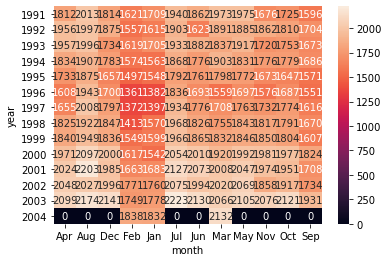

In [71]:
# Some EDA on Time series data 
# Heat map visualization 
heatmap_y_month=pd.pivot_table(data=Toptucker,values='Ridership',index='year',columns='month',aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt='g')

In [72]:
#in Aug we have lighter shade compare ot Feb that means in aug you had higher sales

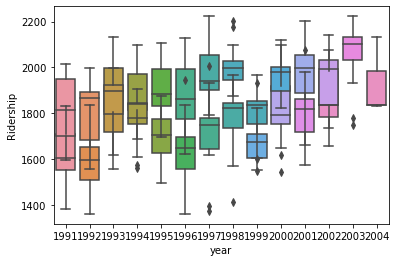

In [73]:
#boxplot
sns.boxplot(x='month',y='Ridership',data=Toptucker)
sns.boxplot(x='year',y='Ridership',data=Toptucker)

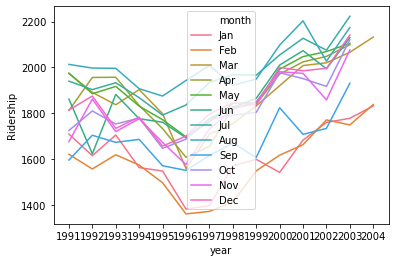

In [77]:
# Line plot for Ridership based on year  and for each month
sns.lineplot(x='year',y='Ridership',hue='month',data=Toptucker)

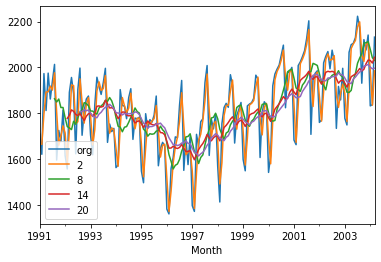

In [88]:
# moving average for the time series to understand better about the trend character in Toptucker
Toptucker.Ridership.plot(label="org")
for i in range(2,24,6):
    Toptucker['Ridership'].rolling(window=i).mean().plot(label=str(i))
plt.legend(loc=3)

In [ ]:
#Here orginal is blue line,thn chk with window 2,8.For this data 14 making sense

In [ ]:
# To further analyze the time series data, Decomposition helps to remove the seasonality from the data.

# Basically Decomposition has three components that is shown in the graphs below i.e Trend, Seasonality and Residual

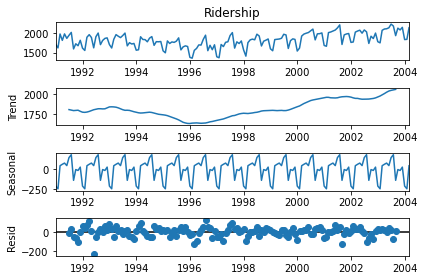

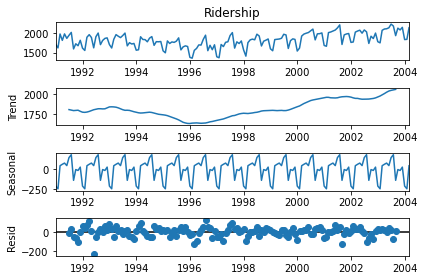

In [92]:
#timeseries plot
decompose_ts_add=seasonal_decompose(Toptucker['Ridership'],model='additive')
decompose_ts_add.plot()

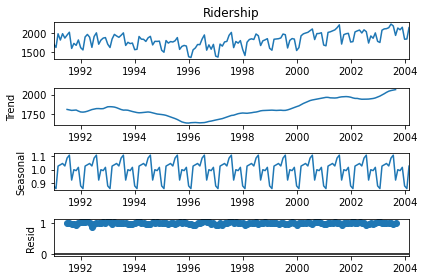

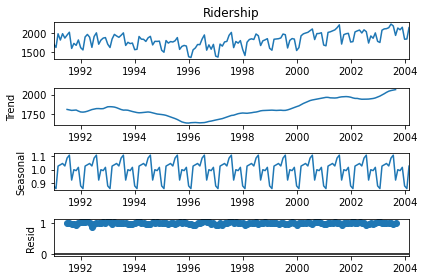

In [94]:
decompose_ts_mul=seasonal_decompose(Toptucker['Ridership'],model='multiplicative')
decompose_ts_mul.plot()

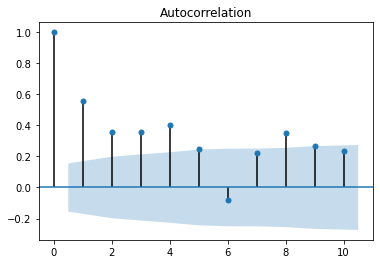

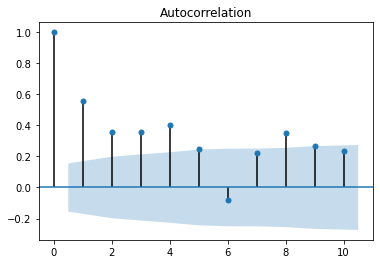

In [95]:
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(Toptucker['Ridership'],lags=10)

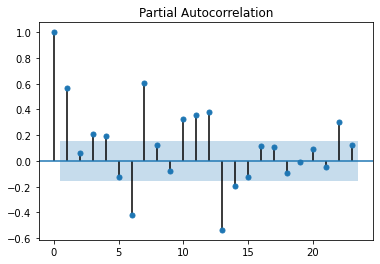

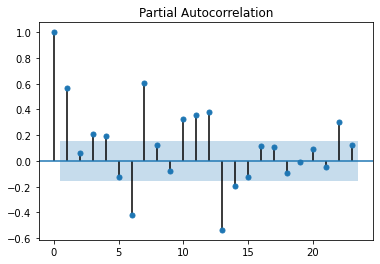

In [96]:
tsa_plots.plot_pacf(Toptucker['Ridership'])

In [97]:
# splitting the data into Train and Test data and considering the last 12 months data as 
# Test data and left over data as train data 
Train=Toptucker.head(147)
Test=Toptucker.tail(12)

In [100]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp=np.abs((pred-org))*100/org
    return np.mean(temp)

In [103]:
# Simple Exponential Method
ses_model=SimpleExpSmoothing(Train['Ridership']).fit()
pred_ses=ses_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ses,Test['Ridership'])

C:\Users\saivenkat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saivenkat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


8.284222955693547

In [106]:
#holt method
h_model=Holt(Train['Ridership']).fit()
pred_holt=h_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_holt,Test['Ridership'])

C:\Users\saivenkat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saivenkat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


7.981190972648027

In [113]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_adds_addt=ExponentialSmoothing(Train['Ridership'],seasonal='add',trend='add',seasonal_periods=12,damped=True).fit()
pred_HWe_model_adds_addt=hwe_model_adds_addt.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_HWe_model_adds_addt,Test['Ridership'])

C:\Users\saivenkat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saivenkat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\saivenkat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


3.3941887885175874

In [115]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_muls_addt=ExponentialSmoothing(Train['Ridership'],seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_hwe_model_muls_addt=hwe_model_muls_addt.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_hwe_model_muls_addt,Test["Ridership"])

C:\Users\saivenkat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\saivenkat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\saivenkat\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


3.118273276069092

In [119]:
pip install pmdarima


  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [122]:
# Lets us use auto_arima from p
from pmdarima import auto_arima
auto_arima_model=auto_arima(Train['Ridership'],start_p=0,start_q=0,max_p=10,max_q=10,m=12,start_P=0,seasonal=True,d=1,D=1,
                            trace=True,error_action="ignore",suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1567.833, Time=0.42 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1520.414, Time=0.27 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1522.117, Time=0.70 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1543.946, Time=0.22 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1522.157, Time=0.26 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1524.080, Time=0.89 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1537.840, Time=0.24 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=1523.699, Time=0.61 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.44 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1543.252, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1502.609, Time=0.24 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1504.248, Time=0.83 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1517.207, Time=0.15 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1504.178, Time=0.76 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.51 sec
 ARIM

In [ ]:
#whichever is gives us least aic will be picked

In [125]:
print(auto_arima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  147
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -746.854
Date:                            Fri, 25 Dec 2020   AIC                           1501.709
Time:                                    23:36:34   BIC                           1513.300
Sample:                                         0   HQIC                          1506.419
                                            - 147                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3577      0.136      2.637      0.008       0.092       0.623
ma.L1         -0.7667      0.108   

In [128]:
# For getting Fitted values for train data set we use 
# predict_in_sample() function 
auto_arima_model.predict_in_sample()

array([   0.        , 1707.2796553 , 1620.55794322, 1972.13447016,
       1812.01251931, 1974.67874763, 1862.11563062, 1939.89693997,
       2012.84982286, 1596.87684035, 1725.31794034, 1676.9441734 ,
       2668.42542956, 1531.53507756, 1901.74711658, 1732.55818211,
       2035.84480803, 1801.48914391, 1781.70374672, 1955.81452677,
       1557.97968887, 1764.68819564, 1719.28710059, 1928.21993083,
       1690.40904709, 1626.65745427, 1961.78254549, 1842.51841233,
       1970.63618583, 1738.85870911, 2010.2758671 , 2028.80984498,
       1661.64210818, 1791.53399917, 1772.8149043 , 1820.96956944,
       1603.01264766, 1515.56522274, 1857.44143314, 1897.15168128,
       1862.85010533, 1717.88179785, 1892.68761146, 1948.04763729,
       1583.94510795, 1754.0436551 , 1746.37038688, 1807.8363311 ,
       1613.13138325, 1524.56290575, 1823.86170584, 1806.44156177,
       1776.3003571 , 1678.22146392, 1853.21187237, 1871.41841605,
       1574.56797752, 1673.90883236, 1651.25056628, 1706.55357

In [ ]:
# For getting predictions for future we use predict() function 

In [130]:
pred_test=pd.Series(auto_arima_model.predict(n_periods=12))
pred_test

0     2060.396600
1     2079.319528
2     2055.348166
3     2142.358393
4     2164.546918
5     1822.930112
6     1992.485442
7     1982.324770
8     2034.246915
9     1786.491532
10    1765.492742
11    2066.488200
dtype: float64

In [131]:
# Adding the index values of Test Data set to predictions of Auto Arima

In [134]:
pred_test.index=Test.index
pred_test

Month
2003-04-01    2060.396600
2003-05-01    2079.319528
2003-06-01    2055.348166
2003-07-01    2142.358393
2003-08-01    2164.546918
2003-09-01    1822.930112
2003-10-01    1992.485442
2003-11-01    1982.324770
2003-12-01    2034.246915
2004-01-01    1786.491532
2004-02-01    1765.492742
2004-03-01    2066.488200
dtype: float64

In [136]:
MAPE(pred_test,Test.Ridership)

3.4401866904999037

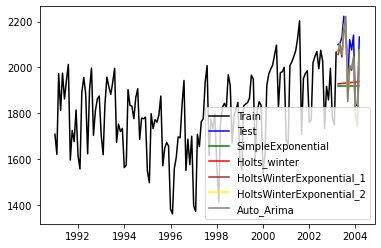

In [137]:
# Visualization of Forecasted values for Test data set using different methods
plt.plot(Train.index, Train["Ridership"], label='Train',color="black")
plt.plot(Test.index, Test["Ridership"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_holt.index, pred_holt, label='Holts_winter',color="red")
plt.plot(pred_HWe_model_adds_addt.index,pred_HWe_model_adds_addt,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_model_muls_addt.index,pred_hwe_model_muls_addt,label="HoltsWinterExponential_2",color="yellow")
plt.plot(pred_hwe_model_muls_addt.index,pred_hwe_model_muls_addt,label="Auto_Arima",color="grey")

plt.legend(loc='best')
